In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option("display.max_columns",101)

In [209]:
df = pd.read_table('/home/bay001/projects/codebase/QC/data/eclip_results-0.1.5/kbp550/results/intermediates/newQC.csv', sep=',', index_col=0)
df.reindex_axis(sorted(df.columns), axis=1)

def build_second_mapped_from_master(df):
    second_mapped = df[[
        '% of reads unmapped: too short',
        '% of reads mapped to too many loci',
        '% of reads unmapped: too many mismatches',
        'Uniquely mapped reads %',
        'Percent Usable / Mapped'
    ]].fillna('0')
    for col in second_mapped.columns:
        try:
            second_mapped[col] = second_mapped[col].apply(
                lambda x: float(x.strip('%'))/100
            )
        except AttributeError:
            second_mapped[col] = second_mapped[col].astype(float)
    return second_mapped

def build_peak_df_from_master(df):
    peaks = df[[
        'Num Peaks',
    ]]
    
    return peaks

def build_raw_number_from_master(df):
    num = df[[
        'Usable Reads',
        'Reads Passing Quality Filter',
        'Uniquely Mapped Reads',
        'Repetitive Reads'
    ]]
    return num
    
def plot_second_mapping_qc(df, ax, percent_usable):
    second_mapped = build_second_mapped_from_master(df)
    second_mapped.plot(kind='bar', ax=ax)
    ax.set_ylim(0,1)
    ax.axhline(percent_usable, linestyle=':')
    ax.set_title("Percent Mapped/Unmapped/Usable (Usable: (dup removed read num) / (unique mapped reads))")

def plot_peak_qc(df, ax):
    peaks = build_peak_df_from_master(df)
    peaks.plot(kind='bar', ax=ax)
    ax.set_title("Peak Numbers (Only for merged files)")
    
def plot_raw_num_qc(df, ax):
    ax.set_title("Number of Reads Mapped/Unmapped/Usable (Usable: (dup removed read num) / (unique mapped reads))")
    num = build_raw_number_from_master(df)
    num.plot(kind='bar', ax=ax)

def plot_qc(df):
    num_samples = len(df.index)

    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5*num_samples,10), sharex=True)
    plot_second_mapping_qc(df, ax=ax1, percent_usable=0.6)
    plot_raw_num_qc(df, ax=ax2)
    plot_peak_qc(df, ax=ax3)

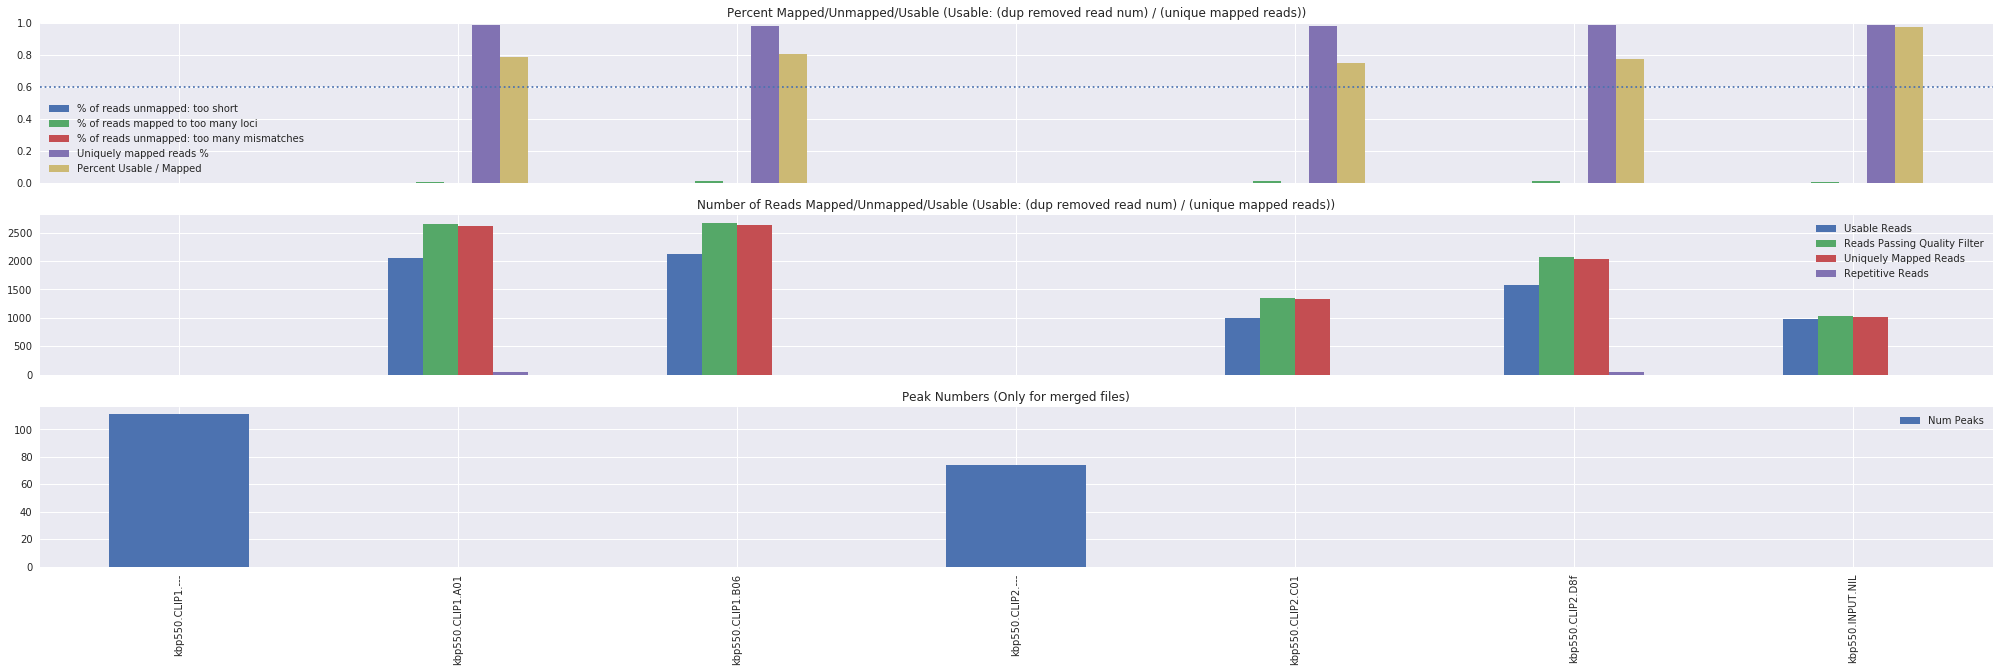

In [210]:
plot_qc(df)

In [205]:
df['Repetitive Reads']

kbp550.11.CLIP.---     NaN
kbp550.11.CLIP.A01    51.0
kbp550.11.CLIP.B06     0.0
kbp550.11.NPUT.NIL     0.0
Name: Repetitive Reads, dtype: float64

,Input Bases,Input Reads,Read 1 Total written (filtered),Read 1 Trimmed bases,Read 1 basepairs processed,Read 1 with adapter,Read 1 with adapter percent,Read 2 Total written (filtered),Read 2 Trimmed bases,Read 2 basepairs processed,Read 2 with adapter,Read 2 with adapter percent,Reads Written,Reads Written perccent,Reads that were too short percent,Too short reads,Total written (filtered),Total written (filtered) percent,Trimmed bases,Trimmed bases percent,% of reads mapped to multiple loci,% of reads mapped to too many loci,% of reads unmapped: other,% of reads unmapped: too many mismatches,% of reads unmapped: too short,Average input read length,Average mapped length,Deletion average length,Deletion rate per base,Insertion average length,Insertion rate per base,"Mismatch rate per base, percent",Reads Passing Quality Filter,Number of reads mapped to multiple loci,Number of reads mapped to too many loci,Number of splices: AT/AC,Number of splices: Annotated (sjdb),Number of splices: GC/AG,Number of splices: GT/AG,Number of splices: Non-canonical,Number of splices: Total,Uniquely mapped reads %,Uniquely Mapped Reads,Percent Repetitive,Repetitive Reads,Processed bases Round 2,Processed reads Round 2,Read 1 Total written (filtered) Round 2,Read 1 Trimmed bases Round 2,Read 1 basepairs processed Round 2,Read 1 with adapter Round 2,Read 1 with adapter percent Round 2,Read 2 Total written (filtered) Round 2,Read 2 Trimmed bases Round 2,Read 2 basepairs processed Round 2,Read 2 with adapter Round 2,Read 2 with adapter percent Round 2,Reads Written Round 2,Reads Written perccent Round 2,Reads that were too short percent Round 2,Too short reads Round 2,Total written (filtered) Round 2,Total written (filtered) percent Round 2,Trimmed bases Round 2,Trimmed bases percent Round 2,Usable Reads,removed_count,total_count,Num Peaks,Percent Usable / Mapped,Percent Usable / Input,Passed QC
kbp550.11.CLIP.---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,False
kbp550.11.CLIP.A01,233748.0,2693.0,99091.0,1.0,114268.0,2693.0,100.0,109575.0,0.0,119480.0,2693.0,100.0,2693.0,100.0,0.0,0.0,208666.0,89.3,1.0,0.0,0.00%,0.83%,0.19%,0.08%,0.04%,77.0,77.47,1.77,0.10%,1.0,0.00%,1.13%,2642.0,0.0,22.0,0.0,0.0,0.0,12.0,0.0,12.0,98.86%,2612.0,0.018938,51.0,208666.0,2693.0,99091.0,0.0,99091.0,0.0,0.0,109369.0,0.0,109575.0,37.0,1.4,2693.0,100.0,0.0,0.0,208460.0,99.9,0.0,0.0,2053.0,559.0,2612.0,NaN,0.785988,0.762347,False
kbp550.11.CLIP.B06,233920.0,2675.0,99125.0,0.0,114430.0,2675.0,100.0,110749.0,0.0,119490.0,2675.0,100.0,2675.0,100.0,0.0,0.0,209874.0,89.7,0.0,0.0,0.00%,1.42%,0.11%,0.00%,0.00%,78.0,78.34,1.63,0.12%,1.0,0.00%,1.10%,2675.0,0.0,38.0,0.0,0.0,2.0,25.0,0.0,27.0,98.47%,2634.0,0.000000,0.0,209874.0,2675.0,99125.0,0.0,99125.0,0.0,0.0,110535.0,0.0,110749.0,37.0,1.4,2675.0,100.0,0.0,0.0,209660.0,99.9,0.0,0.0,2127.0,507.0,2634.0,NaN,0.807517,0.795140,False
kbp550.11.NPUT.NIL,96198.0,1026.0,44937.0,0.0,50672.0,1026.0,100.0,44056.0,0.0,45526.0,1026.0,100.0,1026.0,100.0,0.0,0.0,88993.0,92.5,0.0,0.0,0.00%,0.58%,0.49%,0.10%,0.00%,85.0,85.25,1.52,0.10%,0.0,0.00%,0.94%,1026.0,0.0,6.0,0.0,0.0,0.0,13.0,0.0,13.0,98.83%,1014.0,0.000000,0.0,88993.0,1026.0,44937.0,0.0,44937.0,0.0,0.0,42521.0,0.0,44056.0,1026.0,100.0,1026.0,100.0,0.0,0.0,87458.0,98.3,0.0,0.0,986.0,28.0,1014.0,NaN,0.972387,0.961014,False
